In [1]:
%matplotlib inline
import torch
import cv2
import torch.backends.cudnn as cudnn
import time
import matplotlib
import matplotlib.pyplot as plt
cudnn.benchmark = True

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)
model.to('cuda')

Using cache found in C:\Users\user/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2021-7-23 torch 1.7.1 CUDA:0 (GeForce RTX 3070, 8192.0MB)

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Focus(
        (conv): Conv(
          (conv): Conv2d(12, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
      (1): Conv(
        (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )

In [3]:
names = model.module.names if hasattr(model, 'module') else model.names

In [4]:
colors = [
    [31  , 0   , 255] ,
    [0   , 159 , 255] ,
    [255 , 95  , 0]   ,
    [255 , 19  , 0]   ,
    [255 , 0   , 0]   ,
    [255 , 38  , 0]   ,
    [0   , 255 , 25]  ,
    [255 , 0   , 133] ,
    [255 , 172 , 0]   ,
    [108 , 0   , 255] ,
    [0   , 82  , 255] ,
    [0   , 255 , 6]   ,
    [255 , 0   , 152] ,
    [223 , 0   , 255] ,
    [12  , 0   , 255] ,
    [0   , 255 , 178] ,
    [108 , 255 , 0]   ,
    [184 , 0   , 255] ,
    [255 , 0   , 76]  ,
    [146 , 255 , 0]   ,
    [51  , 0   , 255] ,
    [0   , 197 , 255] ,
    [255 , 248 , 0]   ,
    [255 , 0   , 19]  ,
    [255 , 0   , 38]  ,
    [89  , 255 , 0]   ,
    [127 , 255 , 0]   ,
    [255 , 153 , 0]   ,
    [0   , 255 , 255] ,
    [0   , 255 , 216] ,
    [0   , 255 , 121] ,
    [255 , 0   , 248] ,
    [70  , 0   , 255] ,
    [0   , 255 , 159] ,
    [0   , 216 , 255] ,
    [0   , 6   , 255] ,
    [0   , 63  , 255] ,
    [31  , 255 , 0]   ,
    [255 , 57  , 0]   ,
    [255 , 0   , 210] ,
    [0   , 255 , 102] ,
    [242 , 255 , 0]   ,
    [255 , 191 , 0]   ,
    [0   , 255 , 63]  ,
    [255 , 0   , 95]  ,
    [146 , 0   , 255] ,
    [184 , 255 , 0]   ,
    [255 , 114 , 0]   ,
    [0   , 255 , 235] ,
    [255 , 229 , 0]   ,
    [0   , 178 , 255] ,
    [255 , 0   , 114] ,
    [255 , 0   , 57]  ,
    [0   , 140 , 255] ,
    [0   , 121 , 255] ,
    [12  , 255 , 0]   ,
    [255 , 210 , 0]   ,
    [0   , 255 , 44]  ,
    [165 , 255 , 0]   ,
    [0   , 25  , 255] ,
    [0   , 255 , 140] ,
    [0   , 101 , 255] ,
    [0   , 255 , 82]  ,
    [223 , 255 , 0]   ,
    [242 , 0   , 255] ,
    [89  , 0   , 255] ,
    [165 , 0   , 255] ,
    [70  , 255 , 0]   ,
    [255 , 0   , 172] ,
    [255 , 76  , 0]   ,
    [203 , 255 , 0]   ,
    [204 , 0   , 255] ,
    [255 , 0   , 229] ,
    [255 , 133 , 0]   ,
    [127 , 0   , 255] ,
    [0   , 235 , 255] ,
    [0   , 255 , 197] ,
    [255 , 0   , 191] ,
    [0   , 44  , 255] ,
    [50  , 255 , 0]
]

In [5]:
def label_color(label):
    if label < len(colors):
        return colors[label]
    else:
        return (0, 255, 0)

In [6]:
img = cv2.imread('bus.jpg')

In [7]:
result = model(img)

In [8]:
result.print()

image 1/1: 1080x810 4 persons, 1 bus
Speed: 2.0ms pre-process, 3542.2ms inference, 3.0ms NMS per image at shape (1, 3, 640, 480)


In [9]:
w, h = img.shape[:2]
for x1, y1, x2, y2, conf, class_num in result.xyxy[0]:
    x1, y1, x2, y2, conf, class_num = int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item()), int(conf.item()), int(class_num.item())
    res_img = cv2.rectangle(img, (x1, y1), (x2, y2), label_color(class_num), int(w/600*3))
    cv2.putText(res_img, str(names[class_num]), (x1+10, y1+10), 1, int(w/600*2), label_color(class_num), int(w/600*1))
res_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2RGB)

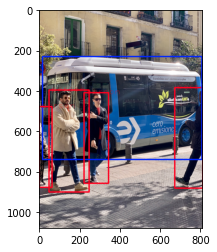

In [10]:
%matplotlib inline
plt.imshow(res_img)